# Projeto de Machine Learning - Regressão Linear 

- A empresa **vende roupas onlines** e também **fornece serviços** de consultoria em estilo e vestuário.

- Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando um aplicativo móvel ou um site;

- A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em **aplicativos móveis ou em seu site**.

## Etapas do projeto
- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados


### 1. Coleta de dados

Empresa de forneceu um arquivo com seus dados:

Arquivo: https://www.kaggle.com/srolka/ecommerce-customers
- Informações pessoais do cliente:
    - **Nome**
    - **Email**
    - **Avatar**
- Informações sobre a interação do cliente com a loja 
    - **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
    - **Time on App**: Tempo médio gasto no app em minutos.
    - **Time on Website**: Tempo médio gasto no site em minutos.
    - **Lenght of Membership**: Há quantos anos o cliente é membro.
    - **Yearly Amount Spent**: Valor gasto anualmente

In [1]:
### Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Este comando é usado apenas em ambientes como o Jupyter Notebook.
# Ele faz com que os gráficos gerados pelo Matplotlib sejam exibidos diretamente dentro do notebook
%matplotlib inline

In [2]:
## Leitura dos dados
clientes = pd.read_csv('Ecommerce.csv')

In [3]:
# Exibe as primeiras 5 linhas do DataFrame 'clientes'.
clientes.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [4]:
# Gera estatísticas descritivas das colunas numéricas do DataFrame 'clientes'.
# Isso inclui contagem, média, desvio padrão, valor mínimo, quartis (25%, 50%, 75%) e valor máximo.
# É útil para ter uma visão rápida da distribuição e da centralidade dos dados numéricos.
clientes.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [5]:
# Exibe um resumo conciso do DataFrame 'clientes'.
# Isso inclui o tipo de dado de cada coluna, o número de valores não-nulos e o uso de memória.
# É útil para verificar rapidamente a integridade e os tipos das variáveis no DataFrame.
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## 2. Análise de dados exploratória

In [6]:
# Importa a classe ProfileReport do módulo ydata_profiling.
# Essa classe é usada para gerar relatórios automáticos e interativos de análise exploratória de dados (EDA) a partir de um DataFrame do pandas.
# O relatório inclui estatísticas descritivas, gráficos de distribuição,
# detecção de valores ausentes, correlações, tipos de variáveis e muito mais.
from ydata_profiling import ProfileReport


ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
# Cria um objeto de relatório de perfil (ProfileReport) a partir do DataFrame "clientes".
# Esse relatório contém uma análise exploratória dos dados (EDA), incluindo:
# - estatísticas descritivas (média, mediana, desvio padrão etc.),
# - detecção de valores ausentes,
# - gráficos de distribuição,
# - correlação entre variáveis,
# - e alertas sobre possíveis problemas nos dados.
relatorio = ProfileReport(clientes, title='Relatorio Clientes do Ecommerce')

# Gera um arquivo HTML contendo o relatório completo e salva com o nome especificado.
# Esse arquivo pode ser aberto em qualquer navegador para visualizar o relatório interativo.
relatorio.to_file('relatorio_ecommerce.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:01<00:00,  4.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
relatorio

In [9]:
#abrir no navegador o relatorio gerado
import webbrowser
webbrowser.open('relatorio_ecommerce.html')

True

### Insights 
- Pessoas que passam necessariamente mais tempo no site não gastam mais!  
- Pessoas que **gastam mais tempo no app** tem uma tendência para **gastar mais**!
- Pessoas que são clientes a algum tempo NÃO gastam mais.
- Pessoas que tem **maior tempo de membro** tem uma tendência a gastar mais.

- Qual a relação do cara que passa mais tempo no site em relação ao valor gasto anual?

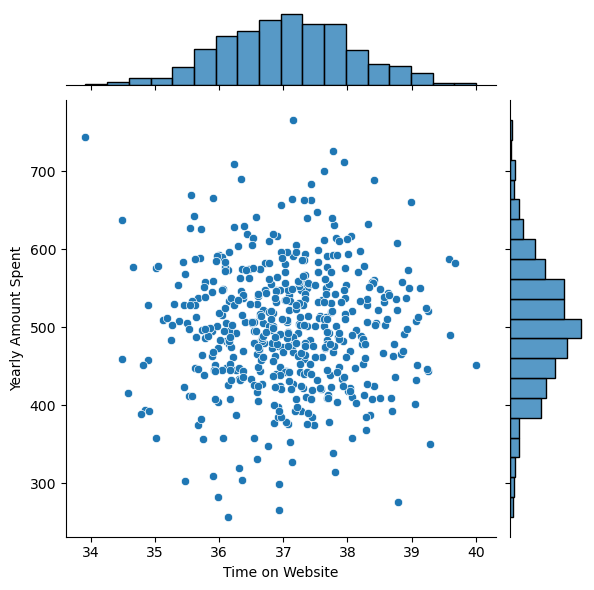

In [10]:
# Cria um gráfico de dispersão combinado (scatter plot) usando o seaborn.
# A função jointplot() combina dois tipos de gráfico:
#  - Um gráfico de dispersão no centro, mostrando a correlação entre as variáveis.
#  - Histogramas (ou distribuições) nas margens, mostrando a distribuição de cada variável separadamente.
# Esse tipo de gráfico é muito útil para analisar se há relação (positiva ou negativa)
# entre o tempo gasto no site e o quanto o cliente gasta anualmente.
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)
plt.show()

- Qual a relação do cara que passa mais tempo no APP em relação ao valor gasto anual?  

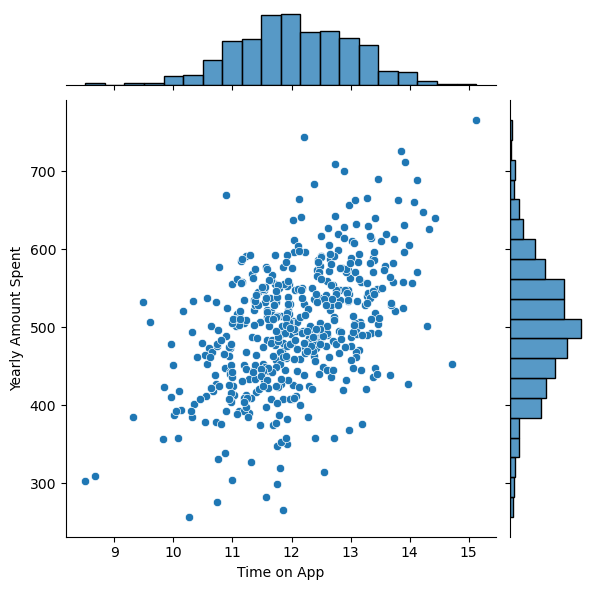

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)
plt.show()

- As pessoas que usam o aplicativo elas são clientes a mais tempo ou não?

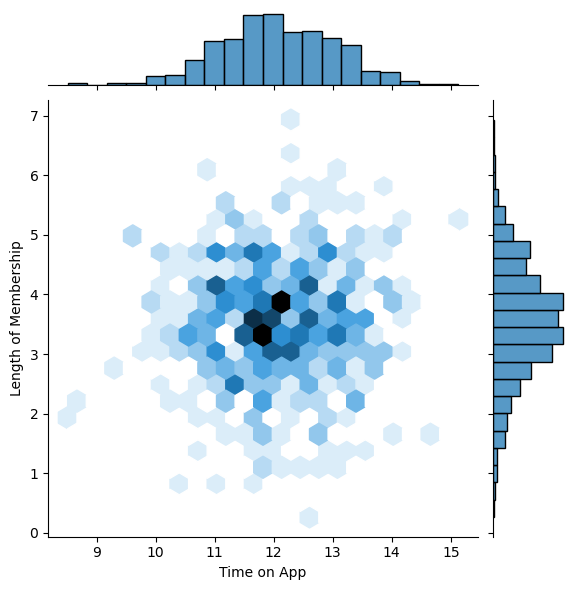

In [ ]:
# O parâmetro 'kind='hex'' cria um gráfico de densidade hexagonal, que é útil para visualizar a concentração de pontos
# em áreas onde há muitos dados sobrepostos, mostrando se há uma correlação entre o tempo gasto no aplicativo
# e o tempo de fidelidade do cliente.
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')
plt.show()

- Quais variáveis conseguimos explicar ou que tem maior impacto no quanto uma pessoa gasta no ano?

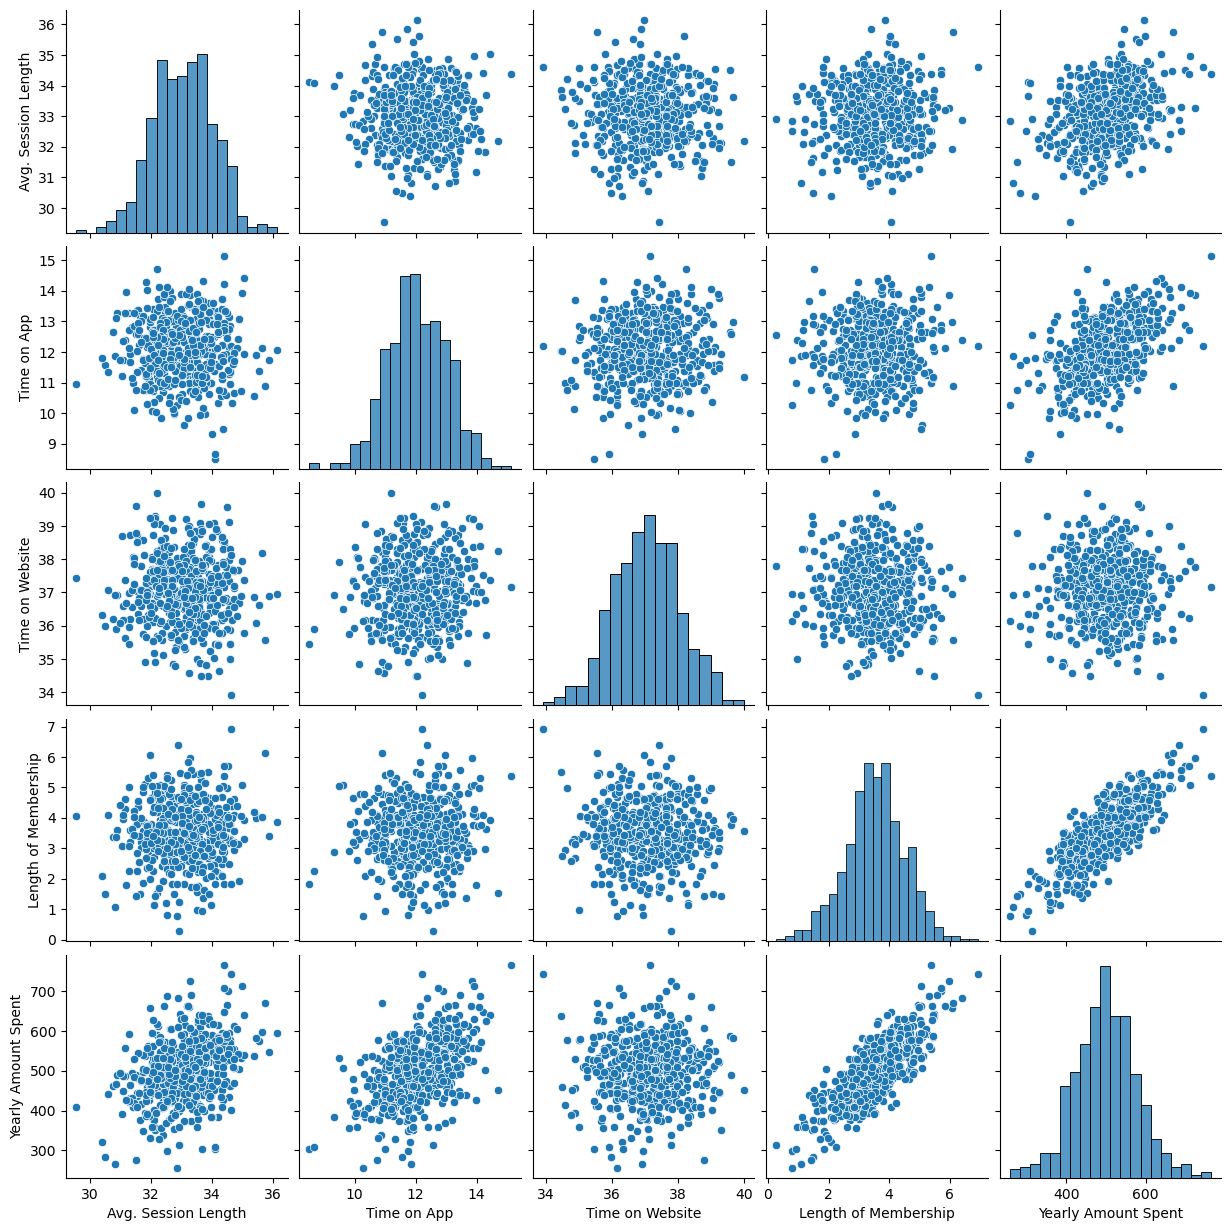

In [13]:
# Cria um gráfico de pares (pairplot) usando o Seaborn
# O pairplot gera uma matriz de gráficos que mostra a relação entre **todas as variáveis numéricas** do DataFrame.
# Para cada par de variáveis, ele cria um gráfico de dispersão (scatter plot) no canto inferior da matriz.
# Na diagonal da matriz, ele mostra a distribuição de cada variável (histograma ou KDE).
# Isso é muito útil para:
# - Observar correlações entre variáveis
# - Identificar padrões ou tendências
# - Detectar outliers ou comportamentos inesperados
sns.pairplot(clientes)
plt.show()

- Como ficaria um modelo linear usando o Tempo de App em relação ao valor gasto?

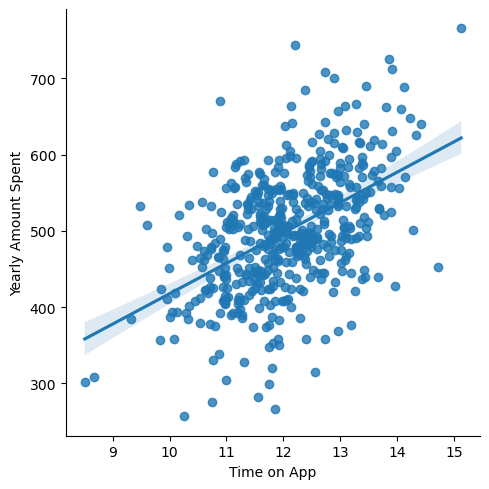

In [14]:
# Cria um gráfico de dispersão com linha de regressão usando Seaborn
# lmplot = "linear model plot" → mostra a relação entre duas variáveis numéricas
# O gráfico mostra:
# 1. Pontos de dispersão (scatter) representando cada cliente
# 2. Uma linha de regressão linear ajustada aos dados
# 3. Uma faixa sombreada ao redor da linha representando o intervalo de confiança
# Esse tipo de gráfico é útil para verificar se existe **relação linear** entre as variáveis.
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=clientes)
plt.show()

- Como ficaria um modelo linear usando o Tempo de Membro em relação ao valor gasto?

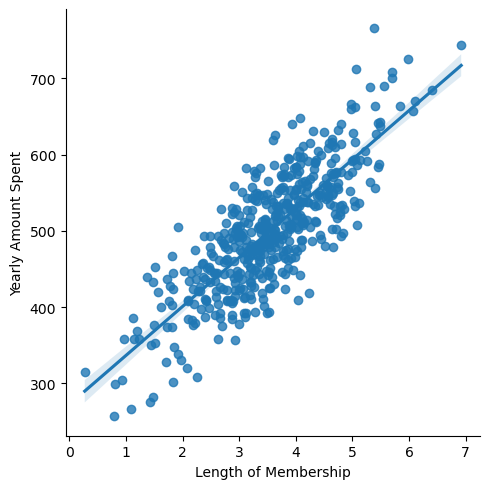

In [15]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)
plt.show()

## 3. Criação de um Modelo com todas as variáveis

- Separa quem meu X e meu y

In [16]:
clientes.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [17]:
# Define a variável y como a coluna 'Yearly Amount Spent' do DataFrame clientes
# Essa variável representará o alvo (target) que queremos prever no modelo de regressão
y = clientes['Yearly Amount Spent']

In [18]:
# Define as features (variáveis independentes) que serão utilizadas para prever o valor gasto anualmente
# Seleciona as colunas 'Avg. Session Length', 'Time on App', 'Time on Website' e 'Length of Membership' do DataFrame clientes
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

- Dividir meu conjunto em treino e teste usando sckit learning

In [19]:
# Importa a função train_test_split do módulo model_selection da biblioteca sklearn.
# Essa função é usada para dividir o conjunto de dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

In [20]:
# Dividindo os dados em conjuntos de treino e teste
# test_size=0.3 significa que 30% dos dados serão usados para teste e 70% para treino
# random_state=42 é usado para garantir a reprodutibilidade da divisão (sempre será a mesma)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Exibe a forma (número de linhas) da série y_train, que contém os valores reais do conjunto de treino
# Isso ajuda a verificar quantas amostras de target temos para o treinamento do modelo
y_train.shape

(350,)

In [ ]:
# Exibe a forma (número de elementos) da série y_test, que contém os valores reais do conjunto de teste
# Isso ajuda a confirmar quantas amostras temos para validar o modelo
y_test.shape


- Criar um modelo de regressão linear usando sklearn

In [25]:
# Essa classe será usada para criar o modelo de regressão linear no projeto
from sklearn.linear_model import LinearRegression


In [26]:
# Criando uma instância do modelo de Regressão Linear
lm = LinearRegression()

- Utilizar o método fit() para treinamendo do meu modelo

In [28]:
# Treina o modelo de regressão linear usando os dados de treino (X_train e y_train)
# Ajusta o modelo aos dados de treino para aprender a relação entre as variáveis independentes e o alvo
lm.fit(X_train, y_train)  

LinearRegression()

- Apresentando os coeficientes para cada variável do meu X

In [31]:
# lm.coef_ contém os coeficientes estimados do modelo de regressão linear
# Cada valor representa a influência de uma das variáveis independentes no valor previsto
# A ordem dos coeficientes corresponde à ordem das colunas em X:
# ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

- Para validar o modelo no conjunto de teste, você precisa utilizar o método predict()

In [32]:
# Faz a predição dos valores de 'Yearly Amount Spent' utilizando o modelo treinado lm
# Aplica o modelo aos dados de teste X_test para obter as previsões ỹ
ỹ = lm.predict(X_test)

In [34]:
ỹ

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

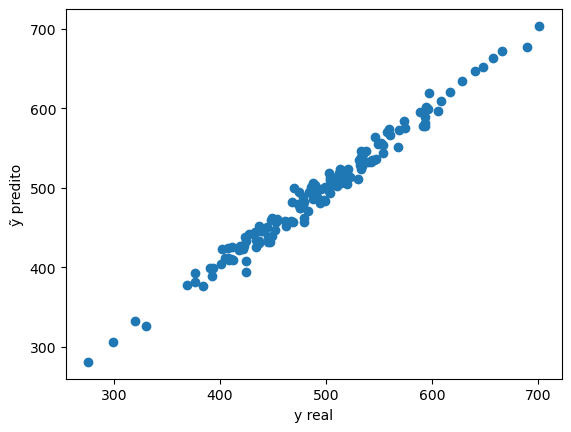

In [35]:
# Cria um gráfico de dispersão (scatter plot) comparando os valores reais (y_test) 
# com os valores preditos (ỹ) pelo modelo de regressão linear.
# Esse gráfico ajuda a visualizar o desempenho do modelo: 
# Quanto mais próximos os pontos estiverem da linha y = x, melhor será a previsão do modelo.
plt.scatter(y_test, ỹ)

# Define o rótulo do eixo x como 'y real', representando os valores reais observados
plt.xlabel('y real')

# Define o rótulo do eixo y como 'ỹ predito', representando os valores previstos pelo modelo
plt.ylabel('ỹ predito')

# Exibe o gráfico na tela
plt.show()

## 4. Avaliando o Modelo  

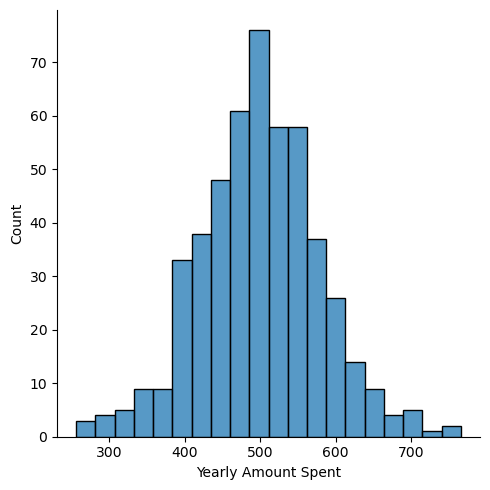

In [36]:
# Cria um gráfico de distribuição (histograma) da variável 'Yearly Amount Spent'
# O displot do Seaborn mostra a frequência ou densidade dos valores gastos anualmente pelos clientes.
sns.displot(clientes, x="Yearly Amount Spent")

# Ajusta automaticamente os parâmetros do subplot para que o layout fique mais apertado,
# evitando sobreposição de elementos como rótulos e títulos.
plt.tight_layout()
plt.show()

In [38]:
# Importa o módulo metrics da biblioteca sklearn, que contém funções para avaliar o desempenho de modelos de machine learning.
from sklearn import metrics 

In [40]:
# Calcula e imprime o Erro Absoluto Médio (MAE - Mean Absolute Error)
# O MAE é a média dos erros absolutos entre as previsões (ỹ) e os valores reais (y_test).
# Ele mede a magnitude média dos erros em um conjunto de previsões, sem considerar a direção.
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))

# Calcula e imprime o Erro Quadrático Médio (MSE - Mean Squared Error)
# O MSE é a média dos quadrados dos erros entre as previsões (ỹ) e os valores reais (y_test).
# Ele penaliza erros maiores de forma mais significativa do que o MAE.
print('MSE:', metrics.mean_squared_error(y_test, ỹ))

# Calcula e imprime a Raiz do Erro Quadrático Médio (RMSE - Root Mean Squared Error)
# O RMSE é a raiz quadrada do MSE. Ele tem a mesma unidade da variável alvo,
# o que o torna mais interpretável do que o MSE.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))

# Calcula e imprime o Coeficiente de Determinação (R-squared ou R²)
# O R² mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.
# Valores mais próximos de 1 indicam que o modelo explica uma grande parte da variância dos dados.
print('R:', metrics.r2_score(y_test,ỹ))

MAE: 8.426091641432054
MSE: 103.91554136503224
RMSE: 10.193897260863102
R: 0.9808757641125857


In [41]:
# Define uma função para calcular o R-quadrado ajustado (Adjusted R-squared)
# O R-quadrado ajustado é uma versão modificada do R-quadrado que leva em conta o número de preditores no modelo.
# Ele penaliza a adição de variáveis independentes que não melhoram significativamente o modelo,
# sendo mais útil para comparar modelos com diferentes números de preditores.
# Parâmetros:
# - y: Valores reais da variável dependente.
# - ỹ: Valores preditos pelo modelo.
# - N: Número de variáveis independentes (features) no modelo.
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

In [42]:
# Calcula e imprime o R-quadrado ajustado (Adjusted R-squared)
# A função adjusted_R() requer o número de variáveis independentes (features),
# que é obtido através de X_train.shape[1] (número de colunas em X_train).
print('R-adjust:', adjusted_R(y_test, ỹ, X_train.shape[1]))

R-adjust: 0.9803481989846571


## Conclusões

- O modelo linear resolveu o problema?

In [45]:
 # Calcula o erro absoluto entre os valores reais (y_test) e os valores preditos (ỹ)
absolute_error = y_test - ỹ

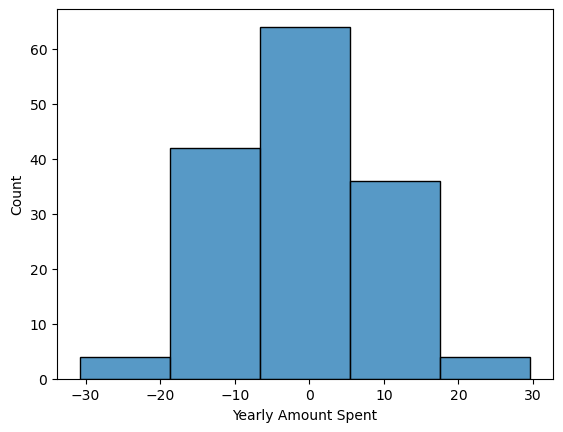

In [48]:
# Cria um histograma dos erros absolutos (resíduos) do modelo.
# O histograma ajuda a visualizar a distribuição dos erros:
# - Se os erros estiverem normalmente distribuídos em torno de zero, isso é um bom sinal para o modelo de regressão linear.
# - A forma do histograma pode indicar se o modelo está subestimando ou superestimando consistentemente os valores.
# O parâmetro 'bins=5' define o número de barras (bins) no histograma.
sns.histplot(absolute_error, bins=5)
plt.show()

- Q1) Qual a variável mais importante do meu modelo? 
- Q2) É melhor eu investir no site ou no aplicativo?

In [49]:
# Cria um DataFrame chamado 'coef' para exibir os coeficientes do modelo de regressão linear.
# - lm.coef_: Contém os valores dos coeficientes calculados pelo modelo treinado.
# - X.columns: Fornece os nomes das colunas (features) de X, que serão usados como índice do DataFrame 'coef'.
# - columns=['Coefs']: Define o nome da única coluna do DataFrame como 'Coefs'.
# Cada coeficiente indica o impacto (positivo ou negativo) de cada variável independente
# no valor da variável dependente ('Yearly Amount Spent'), mantendo as outras variáveis constantes.
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])

# Exibe o DataFrame 'coef', mostrando os coeficientes para cada feature.
coef

Coefs
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732

- A cada aumento em uma unidade no tempo médio das sessões de consultoria com o estilista, temos um aumento de 25.98 dólares gasto no ano;
- A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38.59 dólares;
- O tempo no site reflete muito pouco na receita anual
- A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61.67 dólares